In [48]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.optimizers import Adam



warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/road-accidents-dataset/Road Accident Data.csv


In [49]:
df = pd.read_csv('/kaggle/input/road-accidents-dataset/Road Accident Data.csv')
df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [50]:
print(df)

       Accident_Index Accident Date Day_of_Week              Junction_Control  \
0           BS0000001    01-01-2021    Thursday      Give way or uncontrolled   
1           BS0000002    05-01-2021      Monday      Give way or uncontrolled   
2           BS0000003    04-01-2021      Sunday      Give way or uncontrolled   
3           BS0000004    05-01-2021      Monday           Auto traffic signal   
4           BS0000005    06-01-2021     Tuesday           Auto traffic signal   
...               ...           ...         ...                           ...   
307968      BS0307969    18-02-2022    Thursday  Data missing or out of range   
307969      BS0307970    21-02-2022      Sunday  Data missing or out of range   
307970      BS0307971    23-02-2022     Tuesday      Give way or uncontrolled   
307971      BS0307972    23-02-2022     Tuesday      Give way or uncontrolled   
307972      BS0307973    28-02-2022      Sunday      Give way or uncontrolled   

                           

In [51]:
for col in df.columns:
    if col != 'Accident_Index':
        print(f"\n--- Unique values in '{col}' ---")
        print(df[col].unique())

print('\n')
print(df['Carriageway_Hazards'].unique())
print(df['Carriageway_Hazards'].head(10))


--- Unique values in 'Accident Date' ---
['01-01-2021' '05-01-2021' '04-01-2021' '06-01-2021' '08-01-2021'
 '02-01-2021' '07-01-2021' '10-01-2021' '16-01-2021' '12-01-2021'
 '09-01-2021' '17-01-2021' '25-01-2021' '26-01-2021' '19-01-2021'
 '27-01-2021' '21-01-2021' '22-01-2021' '31-01-2021' '03-02-2021'
 '29-01-2021' '28-01-2021' '20-01-2021' '15-01-2021' '09-02-2021'
 '23-01-2021' '10-02-2021' '30-01-2021' '12-02-2021' '16-02-2021'
 '14-02-2021' '18-02-2021' '21-02-2021' '15-02-2021' '20-02-2021'
 '27-02-2021' '18-01-2021' '07-02-2021' '23-02-2021' '22-02-2021'
 '26-02-2021' '04-03-2021' '03-03-2021' '06-03-2021' '17-02-2021'
 '09-03-2021' '10-03-2021' '02-03-2021' '25-02-2021' '14-03-2021'
 '28-02-2021' '11-02-2021' '01-03-2021' '13-03-2021' '17-03-2021'
 '24-02-2021' '20-03-2021' '05-02-2021' '21-03-2021' '24-03-2021'
 '23-03-2021' '25-03-2021' '27-03-2021' '28-03-2021' '18-03-2021'
 '30-03-2021' '01-04-2021' '31-03-2021' '03-04-2021' '06-04-2021'
 '26-03-2021' '22-03-2021' '29-03-

In [52]:
#Encoding dates into numbers [0::6]
print(df['Day_of_Week'].dtype)
days_map = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}


df['Day_of_Week'] = df['Day_of_Week'].map(days_map)


print(df.head())


object
  Accident_Index Accident Date  Day_of_Week          Junction_Control  \
0      BS0000001    01-01-2021            4  Give way or uncontrolled   
1      BS0000002    05-01-2021            1  Give way or uncontrolled   
2      BS0000003    04-01-2021            0  Give way or uncontrolled   
3      BS0000004    05-01-2021            1       Auto traffic signal   
4      BS0000005    06-01-2021            2       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington

In [53]:
print(df['Junction_Control'].unique())


df['Junction_Control'] = df['Junction_Control'].str.strip().str.lower()


c = {
    'give way or uncontrolled': 0,
    'auto traffic signal': 1,
    'data missing or out of range': np.nan,
    'authorised person': 2,
    'stop sign': 3,
    'not at junction or within 20 metres': 4,
    'auto traffic sigl': 5  
}


df['Junction_Control'] = df['Junction_Control'].map(c)


print(df['Junction_Control'].head())

['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres' 'Auto traffic sigl']
0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Junction_Control, dtype: float64


In [54]:
df = df.apply(lambda col: col.str.lower().str.strip() if col.dtype == 'object' else col)

In [55]:
#Junction_Detail
df['Junction_Detail'] = df['Junction_Detail'].map({
    't or staggered junction': 0,
    'crossroads': 1,
    'not at junction or within 20 metres': 2,
    'roundabout': 3,
    'mini-roundabout': 4,
    'more than 4 arms (not roundabout)': 5,
    'private drive or entrance': 6,
    'slip road': 7,
    'other junction': 8
})

# Accident_Severity
df['Accident_Severity'] = df['Accident_Severity'].map({
    'slight': 0,
    'serious': 1,
    'fatal': 2,
    'fetal': 2   # handling typo
})

# Light_Conditions
df['Light_Conditions'] = df['Light_Conditions'].map({
    'daylight': 0,
    'darkness - lights lit': 1,
    'darkness - lighting unknown': 2,
    'darkness - lights unlit': 3,
    'darkness - no lighting': 4
})

# Carriageway_Hazards
df['Carriageway_Hazards'] = df['Carriageway_Hazards'].map({
    'pedestrian in carriageway - not injured': 0,
    'other object on road': 1,
    'any animal in carriageway (except ridden horse)': 2,
    'previous accident': 3,
    'vehicle load on road': 4
})

# Road_Surface_Conditions
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].map({
    'dry': 0,
    'wet or damp': 1,
    'frost or ice': 2,
    'snow': 3,
    'flood over 3cm. deep': 4
})

# Road_Type
df['Road_Type'] = df['Road_Type'].map({
    'one way street': 0,
    'single carriageway': 1,
    'dual carriageway': 2,
    'roundabout': 3,
    'slip road': 4
})

# Weather_Conditions
df['Weather_Conditions'] = df['Weather_Conditions'].map({
    'fine no high winds': 0,
    'fine + high winds': 1,
    'raining no high winds': 2,
    'raining + high winds': 3,
    'snowing no high winds': 4,
    'snowing + high winds': 5,
    'fog or mist': 6,
    'other': 7
})

# Vehicle_Type
df['Vehicle_Type'] = df['Vehicle_Type'].map({
    'car': 0,
    'taxi/private hire car': 1,
    'motorcycle over 500cc': 2,
    'van / goods 3.5 tonnes mgw or under': 3,
    'goods over 3.5t. and under 7.5t': 4,
    'goods 7.5 tonnes mgw and over': 5,
    'motorcycle 125cc and under': 6,
    'motorcycle 50cc and under': 7,
    'motorcycle over 125cc and up to 500cc': 8,
    'pedal cycle': 9,
    'bus or coach (17 or more pass seats)': 10,
    'minibus (8 - 16 passenger seats)': 11,
    'agricultural vehicle': 12,
    'ridden horse': 13,
    'other vehicle': 14
})

# Police_Force and Local_Authority_(District) as categorical codes
df['Police_Force'] = df['Police_Force'].astype('category').cat.codes
df['Local_Authority_(District)'] = df['Local_Authority_(District)'].astype('category').cat.codes

#urban and rural
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].map({
    'urban':1,
    'rural':0
})

In [56]:
print(df.dtypes)
print(df.head())

Accident_Index                 object
Accident Date                  object
Day_of_Week                     int64
Junction_Control              float64
Junction_Detail                 int64
Accident_Severity               int64
Latitude                      float64
Light_Conditions                int64
Local_Authority_(District)      int16
Carriageway_Hazards           float64
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                     int8
Road_Surface_Conditions         int64
Road_Type                       int64
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area             int64
Weather_Conditions              int64
Vehicle_Type                    int64
dtype: object
  Accident_Index Accident Date  Day_of_Week  Junction_Control  \
0      bs0000001    01-01-2021            4               0.0   
1      bs0000002    05-01-2021            1               

In [57]:
print(df['Carriageway_Hazards'].unique)

<bound method Series.unique of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
307968    NaN
307969    NaN
307970    NaN
307971    NaN
307972    1.0
Name: Carriageway_Hazards, Length: 307973, dtype: float64>


In [58]:
for col in df.columns:
    if col != 'Accident_Index':
        print(f"\n--- Unique values in '{col}' ---")
        print(df[col].unique())


--- Unique values in 'Accident Date' ---
['01-01-2021' '05-01-2021' '04-01-2021' '06-01-2021' '08-01-2021'
 '02-01-2021' '07-01-2021' '10-01-2021' '16-01-2021' '12-01-2021'
 '09-01-2021' '17-01-2021' '25-01-2021' '26-01-2021' '19-01-2021'
 '27-01-2021' '21-01-2021' '22-01-2021' '31-01-2021' '03-02-2021'
 '29-01-2021' '28-01-2021' '20-01-2021' '15-01-2021' '09-02-2021'
 '23-01-2021' '10-02-2021' '30-01-2021' '12-02-2021' '16-02-2021'
 '14-02-2021' '18-02-2021' '21-02-2021' '15-02-2021' '20-02-2021'
 '27-02-2021' '18-01-2021' '07-02-2021' '23-02-2021' '22-02-2021'
 '26-02-2021' '04-03-2021' '03-03-2021' '06-03-2021' '17-02-2021'
 '09-03-2021' '10-03-2021' '02-03-2021' '25-02-2021' '14-03-2021'
 '28-02-2021' '11-02-2021' '01-03-2021' '13-03-2021' '17-03-2021'
 '24-02-2021' '20-03-2021' '05-02-2021' '21-03-2021' '24-03-2021'
 '23-03-2021' '25-03-2021' '27-03-2021' '28-03-2021' '18-03-2021'
 '30-03-2021' '01-04-2021' '31-03-2021' '03-04-2021' '06-04-2021'
 '26-03-2021' '22-03-2021' '29-03-

In [59]:

print(df.columns.tolist())
print(df.columns)

['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


Model Comparison on Full Features:
              Model                                      Best Params   RMSE  \
2             Lasso                                   {'alpha': 0.1}   9.21   
0  LinearRegression                                               {}   9.30   
1             Ridge                                   {'alpha': 0.1}   9.30   
5               SVR  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}   9.38   
4      RandomForest            {'max_depth': 10, 'n_estimators': 50}   9.57   
3      DecisionTree                                {'max_depth': 10}  13.69   

   Accuracy (%)  R² Score  
2         98.32    0.9885  
0         98.31    0.9883  
1         98.30    0.9883  
5         98.26    0.9881  
4         98.20    0.9876  
3         97.35    0.9746  


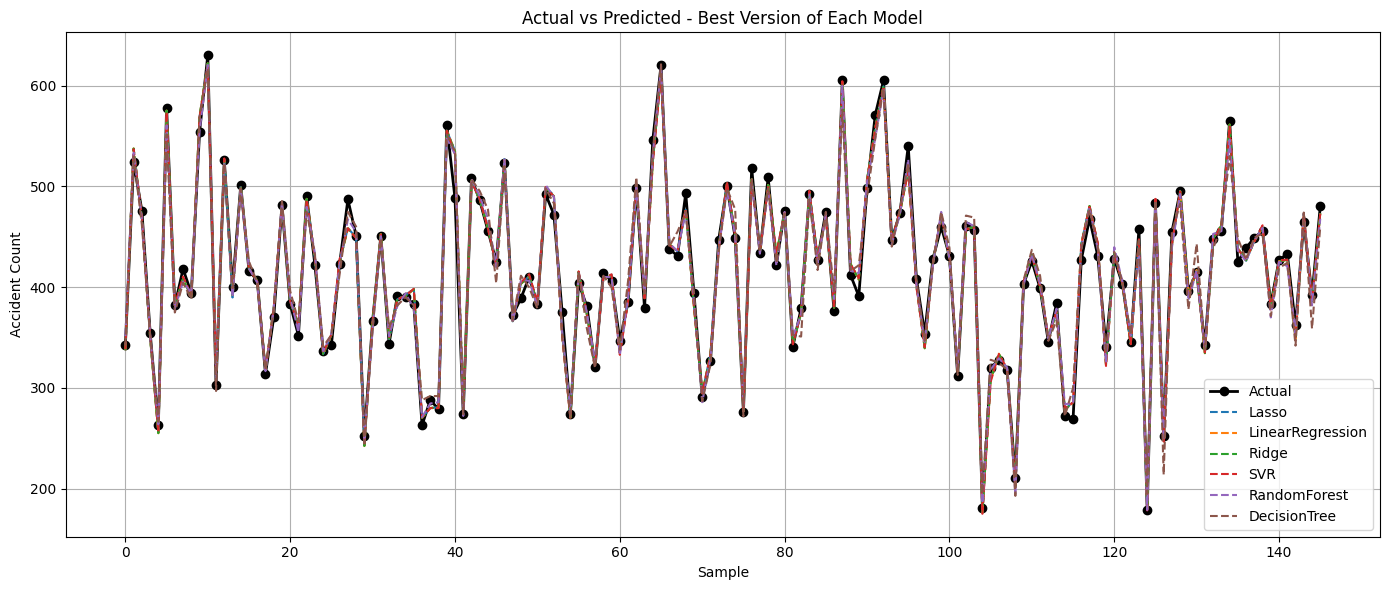

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



# Drop rows with missing target
df.dropna(subset=['Accident Date'], inplace=True)

# Convert 'Accident Date' to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True)

# Feature Engineering
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour.fillna(0)
df['Minute'] = pd.to_datetime(df['Time'], errors='coerce').dt.minute.fillna(0)
df['Date'] = df['Accident Date'].dt.date

# Group by date to get accident count per day
target = df.groupby('Date').size().reset_index(name='y')

# Aggregate features per day
agg_features = df.groupby('Date').agg({
    'Day_of_Week': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Junction_Control': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Junction_Detail': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Accident_Severity': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Light_Conditions': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Local_Authority_(District)': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Carriageway_Hazards': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Number_of_Casualties': 'sum',
    'Number_of_Vehicles': 'sum',
    'Police_Force': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Road_Surface_Conditions': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Road_Type': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Speed_limit': 'mean',
    'Urban_or_Rural_Area': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Weather_Conditions': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Vehicle_Type': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Hour': 'mean',
    'Minute': 'mean'
}).reset_index()

data = pd.merge(target, agg_features, on='Date')

# Encode categorical columns
categorical_cols = [
    'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions',
    'Local_Authority_(District)', 'Carriageway_Hazards', 'Police_Force',
    'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area',
    'Weather_Conditions', 'Vehicle_Type'
]

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Drop the Date column
data = data.drop(columns=['Date'])

# Split data
X = data.drop(columns='y')
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models & Grid
models = [
    {'name': 'LinearRegression', 'model': LinearRegression(), 'params': {}},
    {'name': 'Ridge', 'model': Ridge(), 'params': {'alpha': [0.1, 1, 10]}},
    {'name': 'Lasso', 'model': Lasso(max_iter=10000), 'params': {'alpha': [0.1, 1, 10]}},
    {'name': 'DecisionTree', 'model': DecisionTreeRegressor(), 'params': {'max_depth': [5, 10, 20]}},
    {'name': 'RandomForest', 'model': RandomForestRegressor(), 'params': {'n_estimators': [10, 50], 'max_depth': [5, 10]}},
    {'name': 'SVR', 'model': SVR(), 'params': {'kernel': ['linear', 'rbf'], 'C': [1, 10], 'gamma': ['scale']}},
]

results = []

for item in models:
    grid = GridSearchCV(item['model'], item['params'], cv=3, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    accuracy = 100 - (mape * 100)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': item['name'],
        'Best Params': grid.best_params_,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE (%)': round(mape * 100, 2),
        'Accuracy (%)': round(accuracy, 2),
        'R² Score': round(r2, 4),
        'y_pred': y_pred.tolist()
    })

results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("Model Comparison on Full Features:")
print(results_df[['Model', 'Best Params', 'RMSE', 'Accuracy (%)', 'R² Score']])

# Plot actual vs best predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual', color='black', linewidth=2, marker='o')

for _, row in results_df.iterrows():
    plt.plot(row['y_pred'], label=row['Model'], linestyle='--')

plt.title("Actual vs Predicted - Best Version of Each Model")
plt.xlabel("Sample")
plt.ylabel("Accident Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.optimizers import Adam

# Preprocess 'Accident Date'
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')
df['day'] = df['Accident Date'].dt.day
df['month'] = df['Accident Date'].dt.month
df['year'] = df['Accident Date'].dt.year

date_scaler = MinMaxScaler()
df[['day_norm', 'month_norm', 'year_norm']] = date_scaler.fit_transform(df[['day', 'month', 'year']])
df['Date_Encoded'] = df['day_norm'] + df['month_norm'] + df['year_norm']

# Convert 'Time' to minutes since midnight and normalize
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce')
df['Minutes_Since_Midnight'] = (df['Time'].dt.hour * 60 + df['Time'].dt.minute) / (24 * 60)
df.drop(columns=['Time'], inplace=True)

# Drop unnecessary columns
df.drop(columns=['Accident_Index', 'Accident Date', 'day', 'month', 'year', 'day_norm', 'month_norm', 'year_norm'], inplace=True)

# Encode non-numeric features
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Separate features and target
X = df.drop(['Accident_Severity'], axis=1)
y = df['Accident_Severity']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter grid
hyperparams = [
    {'layers': [64, 32], 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'epochs': 20},
    {'layers': [128, 64], 'dropout': 0.5, 'lr': 0.0005, 'batch_size': 64, 'epochs': 30},
    {'layers': [32, 16], 'dropout': 0.2, 'lr': 0.005, 'batch_size': 16, 'epochs': 15},
]

results = []

# Train models with different hyperparameters
for i, hp in enumerate(hyperparams):
    print(f"\nTraining model {i+1} with hyperparameters: {hp}")
    
    model = Sequential()
    model.add(Dense(hp['layers'][0], activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp['dropout']))
    model.add(Dense(hp['layers'][1], activation='relu'))
    model.add(Dropout(hp['dropout']))
    model.add(Dense(y_categorical.shape[1], activation='softmax'))

    optimizer = Adam(learning_rate=hp['lr'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=hp['epochs'], 
                        batch_size=hp['batch_size'], 
                        verbose=0)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    results.append({
        'Model': i+1,
        'Layers': hp['layers'],
        'Dropout': hp['dropout'],
        'Learning Rate': hp['lr'],
        'Batch Size': hp['batch_size'],
        'Epochs': hp['epochs'],
        'Test Accuracy': round(acc, 4),
        'Test Loss': round(loss, 4)
    })

results_df = pd.DataFrame(results)
print("\nEvaluation Summary:")
print(results_df)




Training model 1 with hyperparameters: {'layers': [64, 32], 'dropout': 0.3, 'lr': 0.001, 'batch_size': 32, 'epochs': 20}

Training model 2 with hyperparameters: {'layers': [128, 64], 'dropout': 0.5, 'lr': 0.0005, 'batch_size': 64, 'epochs': 30}

Training model 3 with hyperparameters: {'layers': [32, 16], 'dropout': 0.2, 'lr': 0.005, 'batch_size': 16, 'epochs': 15}
